# Importing Libraries

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

# Preparing the Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [4]:
df['Class'].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

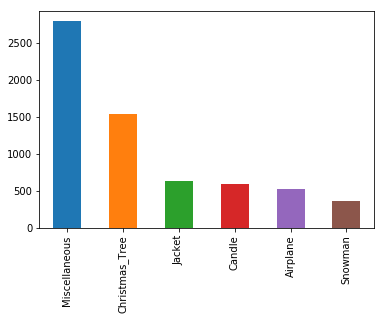

In [5]:
df['Class'].value_counts().plot.bar()

In [6]:

train_image = 'D:/sem6/dl/feb-hack/dataset/train'

test_image = 'D:/sem6/dl/feb-hack/dataset/test'


In [7]:

train_df,valid_df = train_test_split(df, test_size = 0.15, stratify = df.Class.values, shuffle = True)
train_df.reset_index(inplace = True, drop = True)
valid_df.reset_index(inplace = True, drop = True)

In [8]:
train_df.head()

,Image,Class
0,image7019.jpg,Christmas_Tree
1,image1717.jpg,Airplane
2,image6534.jpg,Candle
3,image4343.jpg,Miscellaneous
4,image8477.jpg,Miscellaneous


In [9]:
train_df['Class'].value_counts()

Miscellaneous     2380
Christmas_Tree    1308
Jacket             544
Candle             504
Airplane           455
Snowman            307
Name: Class, dtype: int64

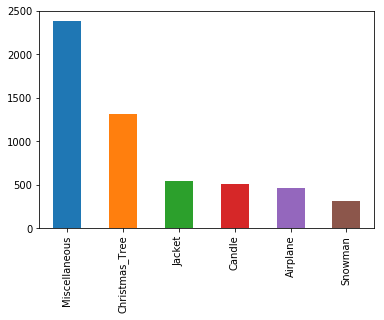

In [10]:
train_df['Class'].value_counts(sort=True).plot.bar()

In [11]:
valid_df.head()

,Image,Class
0,image6538.jpg,Airplane
1,image8560.jpg,Christmas_Tree
2,image8959.jpg,Christmas_Tree
3,image8947.jpg,Miscellaneous
4,image5625.jpg,Miscellaneous


In [12]:
valid_df['Class'].value_counts()

Miscellaneous     421
Christmas_Tree    231
Jacket             96
Candle             89
Airplane           80
Snowman            54
Name: Class, dtype: int64

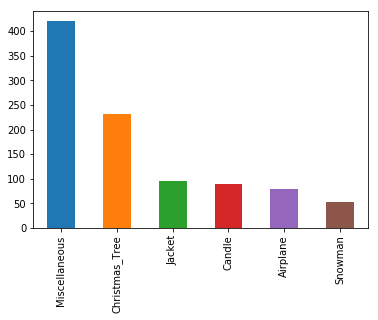

In [13]:
valid_df['Class'].value_counts().plot.bar()

# Image Processing

In [14]:
image_size = [299, 299]

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_dataframe(dataframe=train_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299, 299), batch_size=32)

Found 5498 validated image filenames belonging to 6 classes.


In [16]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_dataframe(dataframe=valid_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299, 299), batch_size=32)

Found 971 validated image filenames belonging to 6 classes.


# Preparing the Model

In [17]:
incep = InceptionResNetV2(input_shape = image_size + [3], weights='imagenet', include_top = False)
for layer in incep.layers:
  layer.trainable = False  
x = Flatten()(incep.output)
prediction = Dense(6, activation='softmax')(x)
model = Model(inputs=incep.input, outputs=prediction)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

conv2d_169 (Conv2D)             (None, 8, 8, 224)    129024      activation_168[0][0]             
__________________________________________________________________________________________________
batch_normalization_169 (BatchN (None, 8, 8, 224)    672         conv2d_169[0][0]                 
__________________________________________________________________________________________________
activation_169 (Activation)     (None, 8, 8, 224)    0           batch_normalization_169[0][0]    
__________________________________________________________________________________________________
conv2d_167 (Conv2D)             (None, 8, 8, 192)    399360      block8_1_ac[0][0]                
__________________________________________________________________________________________________
conv2d_170 (Conv2D)             (None, 8, 8, 256)    172032      activation_169[0][0]             
__________________________________________________________________________________________________
batch_norm

# Build/Compile the Model

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
holiday = model.fit_generator(
  training_set,
  validation_data = validation_set,
  epochs = 12,
  steps_per_epoch = training_set.n//32,
  validation_steps = validation_set.n//32 
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
171/171 [==============================] - 1197s 7s/step - loss: 2.8557 - accuracy: 0.7905 - val_loss: 1.9537 - val_accuracy: 0.8573
Epoch 2/12
171/171 [==============================] - 1199s 7s/step - loss: 1.8343 - accuracy: 0.8738 - val_loss: 2.1011 - val_accuracy: 0.8698
Epoch 3/12
171/171 [==============================] - 1214s 7s/step - loss: 1.4907 - accuracy: 0.9040 - val_loss: 2.0223 - val_accuracy: 0.8896
Epoch 4/12
171/171 [==============================] - 1213s 7s/step - loss: 1.2396 - accuracy: 0.9208 - val_loss: 3.4126 - val_accuracy: 0.8427
Epoch 5/12
171/171 [==============================] - 1192s 7s/step - loss: 1.4481 - accuracy: 0.9191 - val_loss: 3.5146 - val_accuracy: 0.8729
Epoch 6/12
171/171 [==============================] - 1446s 8s/step - loss: 1.1211 - accuracy: 0.9254 - val_loss: 3.3880 - val_accuracy: 0.8823
Epoch 7/12
171/171 [==============================] - 1494s 

# Plot Loss/Accuracy

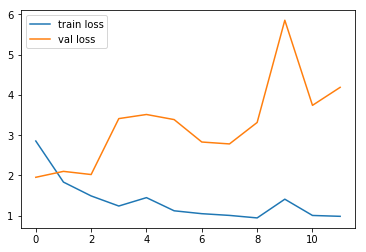

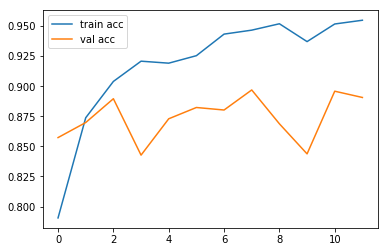

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(holiday.history['loss'], label='train loss')
plt.plot(holiday.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(holiday.history['accuracy'], label='train acc')
plt.plot(holiday.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Predictions for Test Data

In [24]:
name = []
y_pred = []
labels = (training_set.class_indices)
labels = dict((v, k) for k, v in labels.items())
for i in os.listdir('D:/sem6/dl/feb-hack/dataset/test'):
    name.append(i)
    i = 'D:/sem6/dl/feb-hack/dataset/test/' + i
    img = image.load_img(i, target_size = (299,299,3))
    img = image.img_to_array(img) / 255
    pred = model.predict(img.reshape(1,299,299,3))
    y_pred.append(labels[np.argmax(pred[0])])
    
data = pd.DataFrame((zip(name, y_pred)), columns = ['Image', 'Class'])
data.head()

TypeError: data argument can't be an iterator

In [23]:
data.shape

NameError: name 'data' is not defined

In [46]:

data.to_csv('a2.csv', index = False)

In [25]:
from tensorflow import keras
model.save("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets
